In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path


In [270]:
def infection(S, I, N, iterations, I_comp, S_comp, beta):    
    for i in range(iterations):
        S, I = S - beta * ((S * I) / N), I + beta * ((S * I) / N)
        if(I >= N): # maximum atteint
            I = N
            S = 0
        S_comp.append(S)
        I_comp.append(I)

In [271]:
def SI_mse_calc(N,contamine):
    mse = 1000000000000
    iterations = len(contamine)
    betarange = np.linspace(0,200,201)
    for pas in betarange:
        S = N - 1
        I = 1
        S_comp = [] # infected compartment
        I_comp = [] # susceptible compartment
        beta = pas/100
        infection(S, I, N, iterations, I_comp, S_comp, beta)
        newmsi = np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean()
        if(newmsi < mse):
            mse = newmsi
            betavalue = beta
    return [mse,betavalue]

## Densité population 1/2

### 5000 individus

In [272]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population5000"

In [273]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    28  3102396        0     17  3102443
   Init    Run  Mesures  Close  Total
0   577  10647        0      0  11225


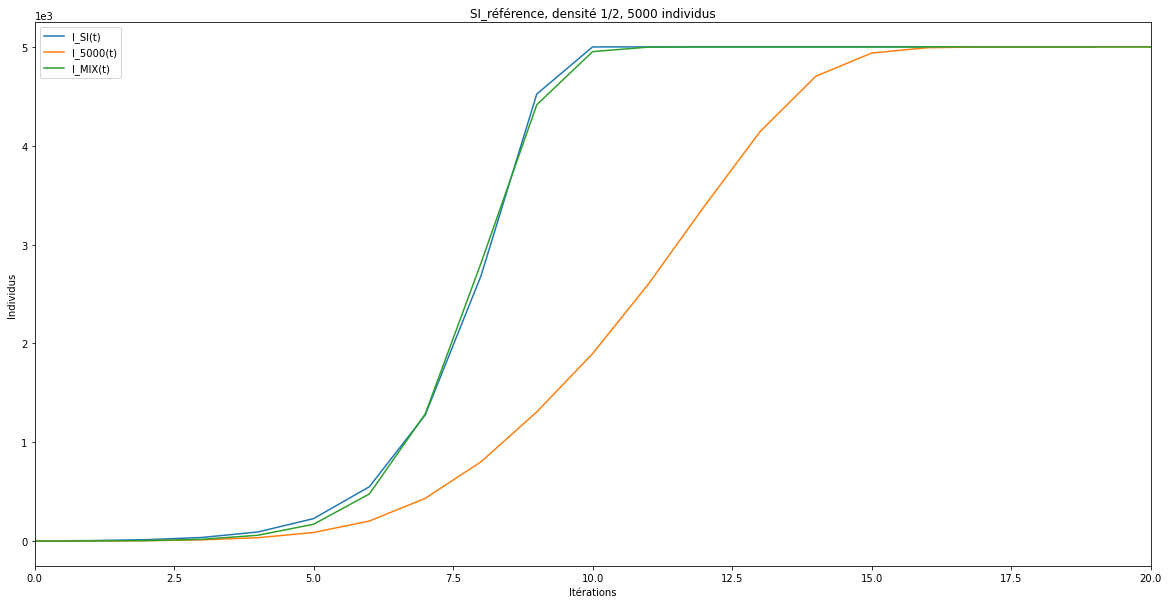

In [274]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1.48
iterations = 20

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [275]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  6927.88839506782  pour un paramètre beta =  0.97
MSE minimal (I_MIX,I_SI) :  272.4468469845275  pour un paramètre beta =  1.48
MSE (I_5000,I_MIX) :  220077.77333333335


### 20000 individus

In [276]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population20000"

In [277]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    95  7990237       26      6  7990365
   Init    Run  Mesures  Close  Total
0   797  38959       29      1  39788


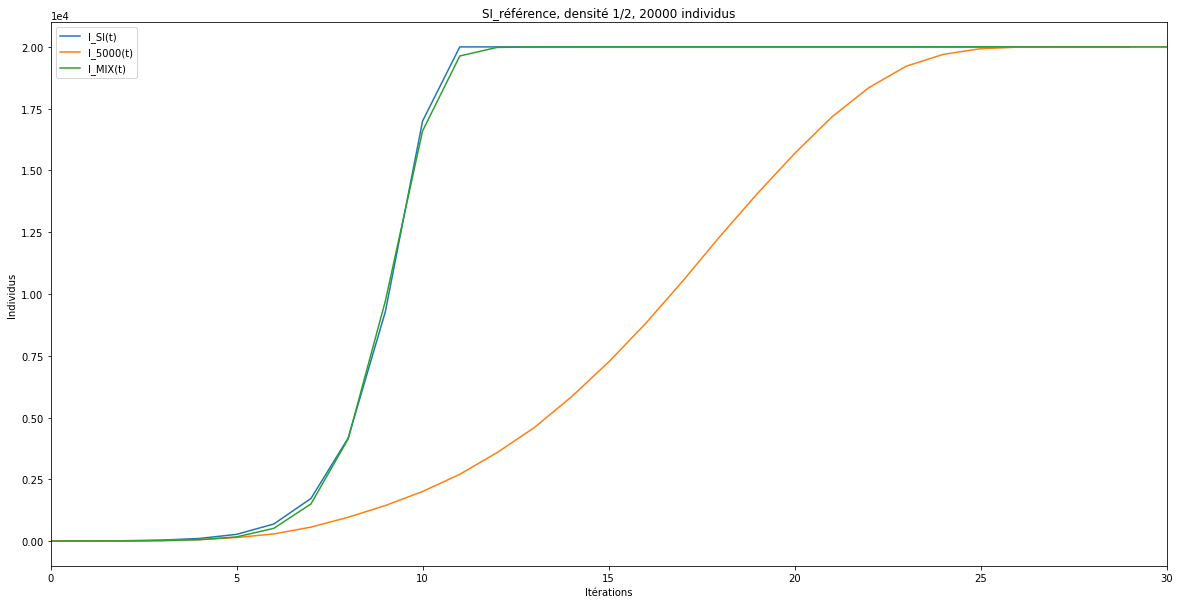

In [278]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1.55
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [279]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  478996.3302636574  pour un paramètre beta =  0.7
MSE minimal (I_MIX,I_SI) :  3826.2425701777775  pour un paramètre beta =  1.55
MSE (I_5000,I_MIX) :  11915271.606666667


### 50000 individus

In [280]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population50000"

In [281]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   121  14240188        5      8  14240323
   Init    Run  Mesures  Close  Total
0   872  95071       49     31  96024


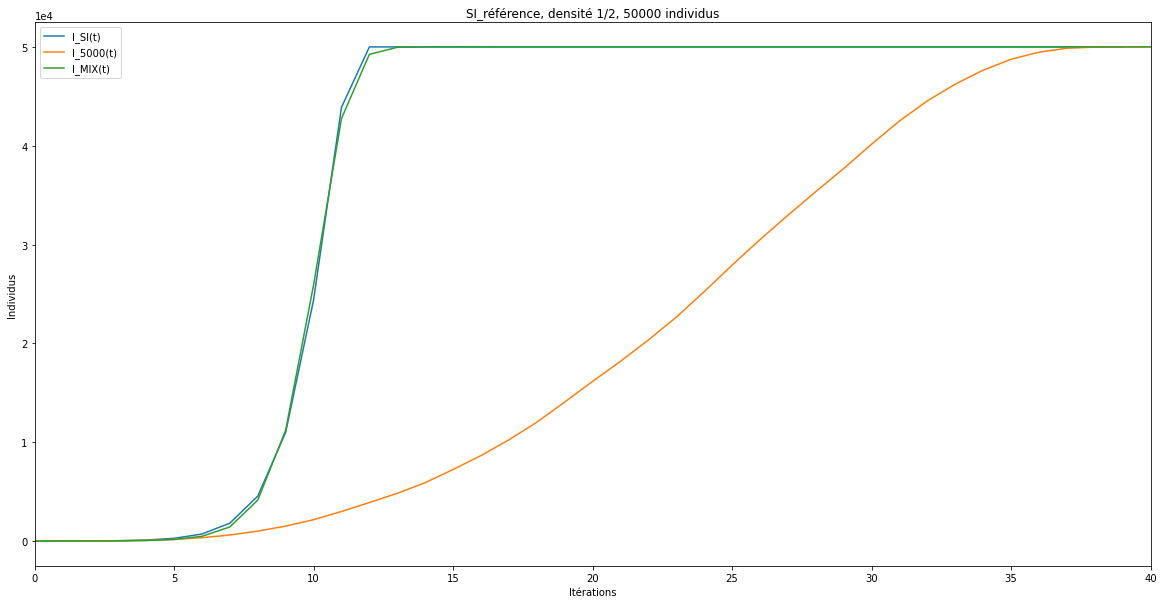

In [282]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1.56
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [283]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  7806822.943926442  pour un paramètre beta =  0.52
MSE minimal (I_MIX,I_SI) :  30641.318596710502  pour un paramètre beta =  1.56
MSE (I_5000,I_MIX) :  148414464.82


### 100000 individus

In [284]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population100000"

In [285]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1060  20063840       10     11  20064922
   Init     Run  Mesures  Close   Total
0  1064  182438       48     53  183605


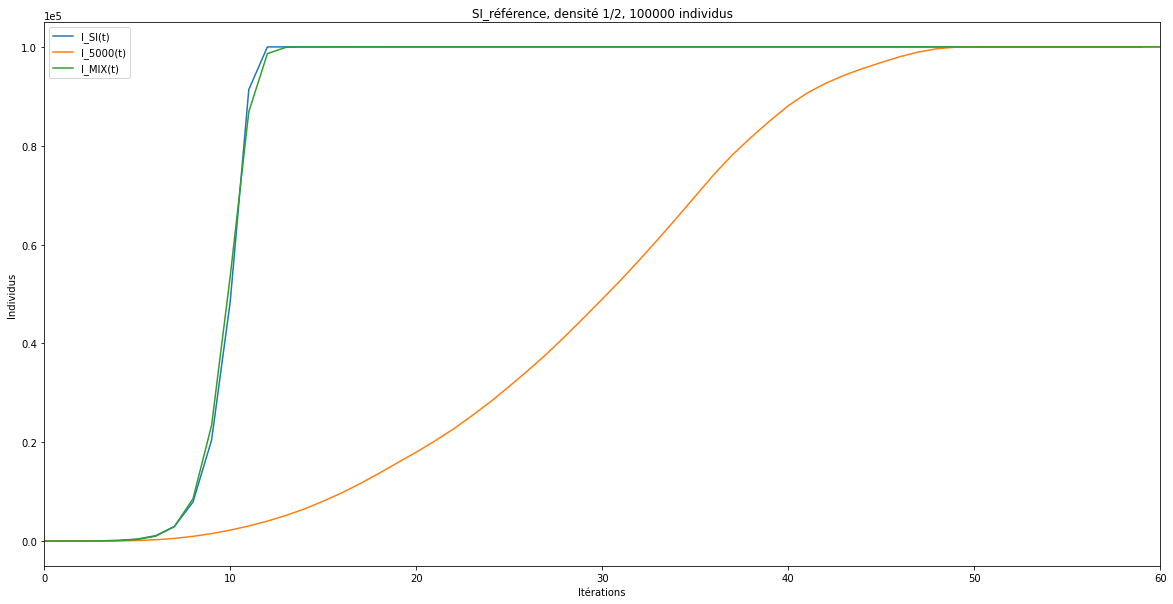

In [286]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1.72
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [287]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  43396620.11018591  pour un paramètre beta =  0.43
MSE minimal (I_MIX,I_SI) :  384062.6821590987  pour un paramètre beta =  1.72
MSE (I_5000,I_MIX) :  915036026.9866667


## Densité population 1/4

### 5000 individus

In [288]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population5000"

In [289]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    18  3550746        0     33  3550799
   Init    Run  Mesures  Close  Total
0   593  10286       41      0  10921


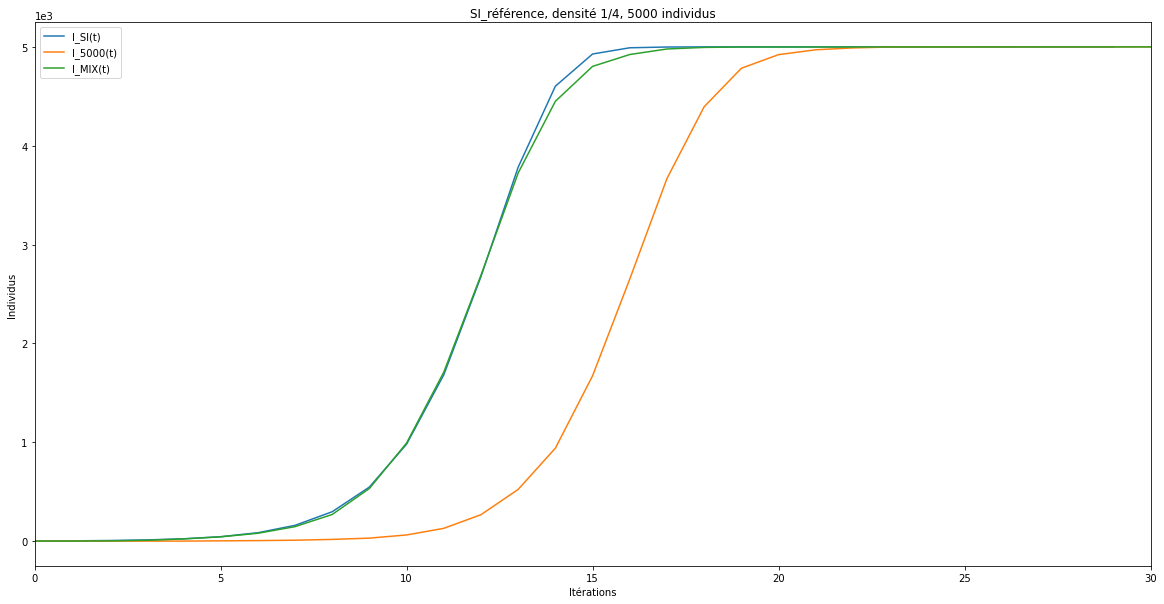

In [290]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.89
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [291]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  4276.335293307601  pour un paramètre beta =  0.63
MSE minimal (I_MIX,I_SI) :  332.3486550526147  pour un paramètre beta =  0.89
MSE (I_5000,I_MIX) :  328114.8933333333


### 20000 individus

In [292]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population20000"

In [293]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    94  8934551        2     11  8934659
   Init    Run  Mesures  Close  Total
0   567  38963        1     31  39564


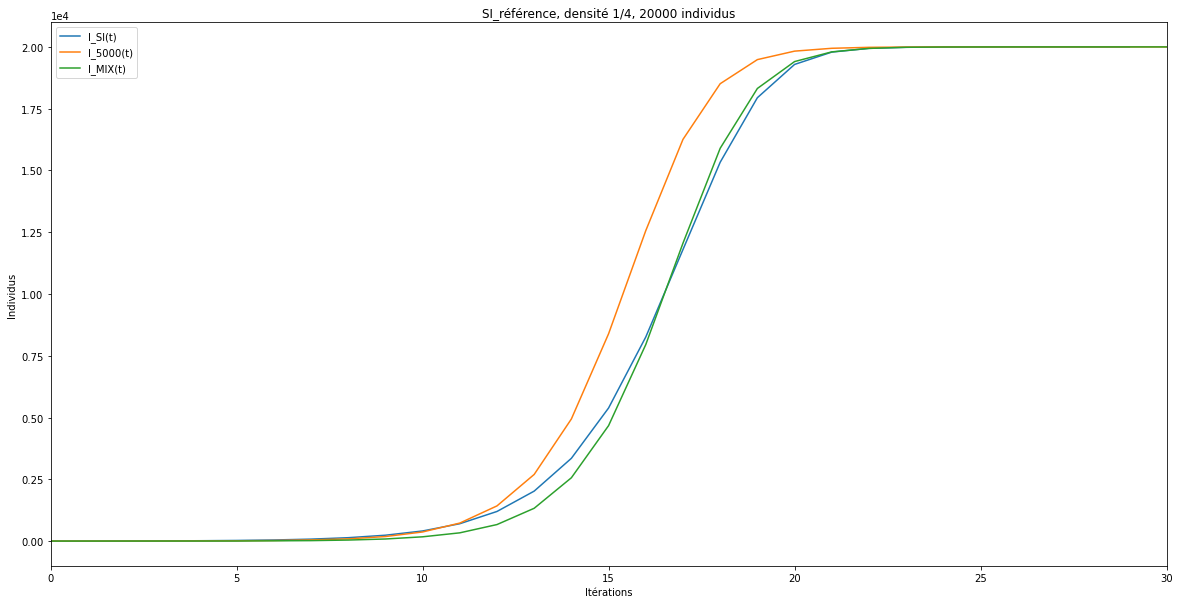

In [294]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.73
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [295]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  6513.525723180276  pour un paramètre beta =  0.79
MSE minimal (I_MIX,I_SI) :  18365.44342010971  pour un paramètre beta =  0.73
MSE (I_5000,I_MIX) :  462919.0733333333


### 50000 individus

In [296]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population50000"

In [297]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   230  15860662        5     21  15860919
   Init    Run  Mesures  Close  Total
0   784  92271       33     39  93128


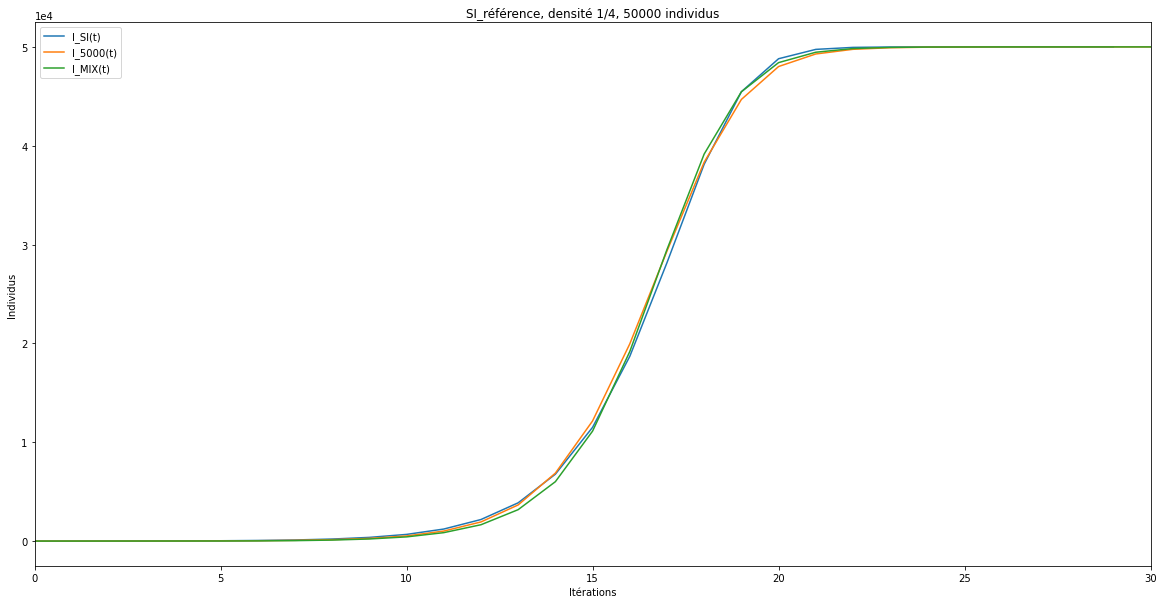

In [298]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.81
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [299]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  34173.578349111376  pour un paramètre beta =  0.81
MSE minimal (I_MIX,I_SI) :  33709.583500544686  pour un paramètre beta =  0.81
MSE (I_5000,I_MIX) :  28506.986666666668


### 100000 individus

In [300]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population100000"

In [301]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1077  22130102       10     11  22131201
   Init     Run  Mesures  Close   Total
0  1318  178028       86     34  179468


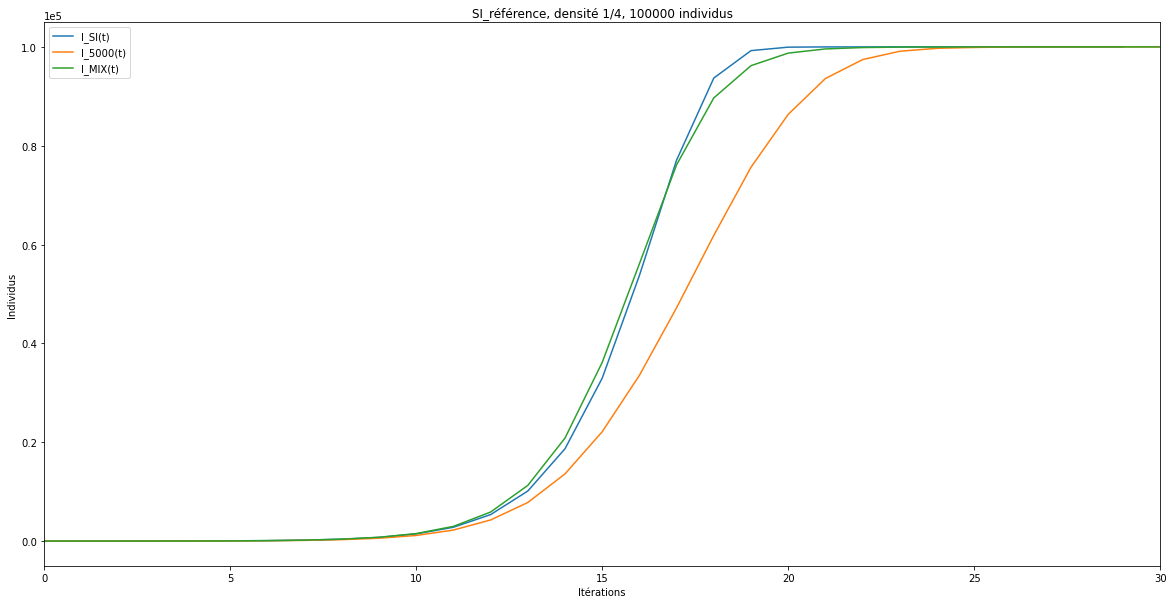

In [302]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.94
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [303]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  2053117.8405182464  pour un paramètre beta =  0.84
MSE minimal (I_MIX,I_SI) :  334054.93523083813  pour un paramètre beta =  0.94
MSE (I_5000,I_MIX) :  20026996.313333333


## Densité population 1/8

### 5000 individus

In [304]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population5000"

In [305]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    28  3705542        0     27  3705598
   Init   Run  Mesures  Close  Total
0   774  9858       32      0  10666


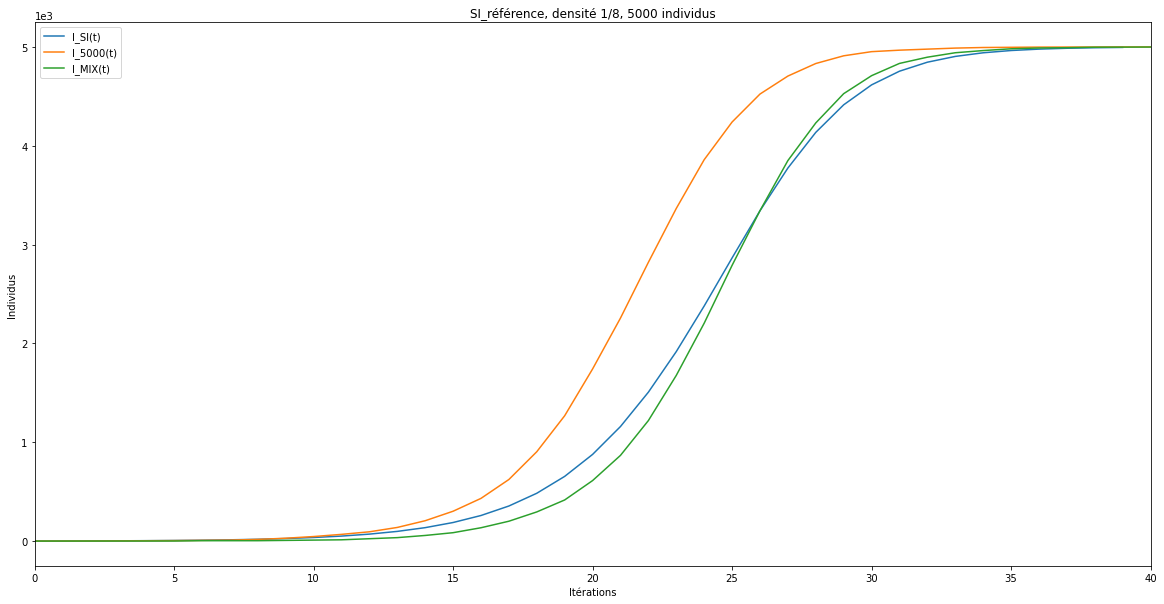

In [306]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.39
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [307]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  465.58987683378064  pour un paramètre beta =  0.45
MSE minimal (I_MIX,I_SI) :  3576.8014108978027  pour un paramètre beta =  0.39
MSE (I_5000,I_MIX) :  117531.16


### 20000 individus

In [308]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population20000"

In [309]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   524  9269510        2     41  9270079
   Init    Run  Mesures  Close  Total
0   532  38555       34      1  39123


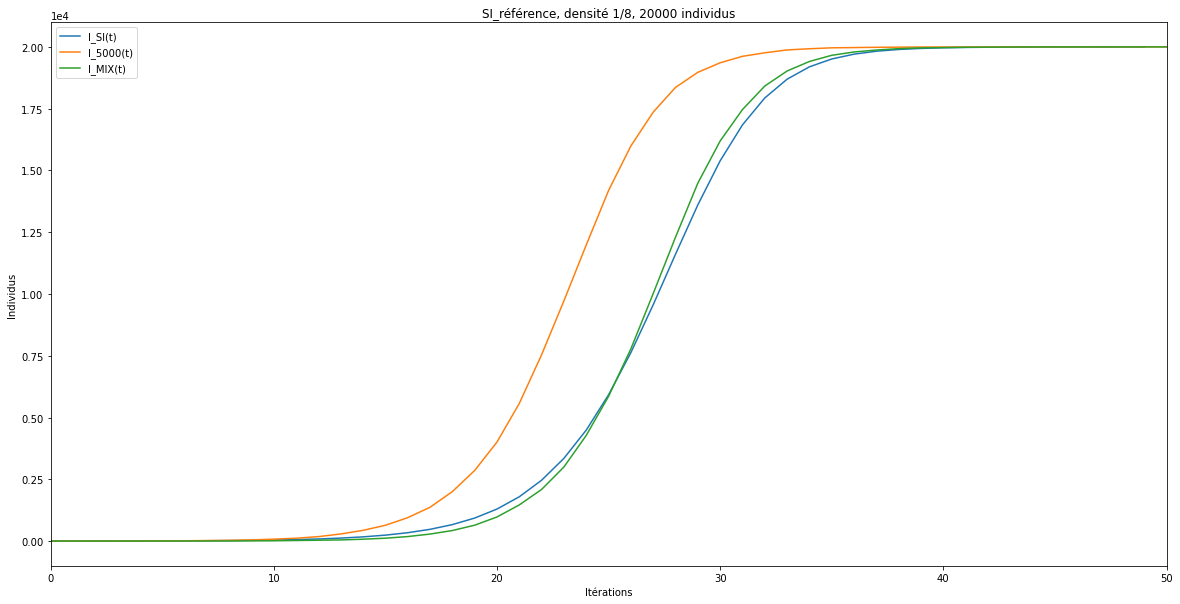

In [310]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.41
iterations = 50

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [311]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  7221.606816760491  pour un paramètre beta =  0.49
MSE minimal (I_MIX,I_SI) :  24603.67475456321  pour un paramètre beta =  0.41
MSE (I_5000,I_MIX) :  2900954.526666667


### 50000 individus

In [312]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population50000"

In [313]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   184  16219475        5      8  16219674
   Init    Run  Mesures  Close  Total
0   499  93888       33     31  94452


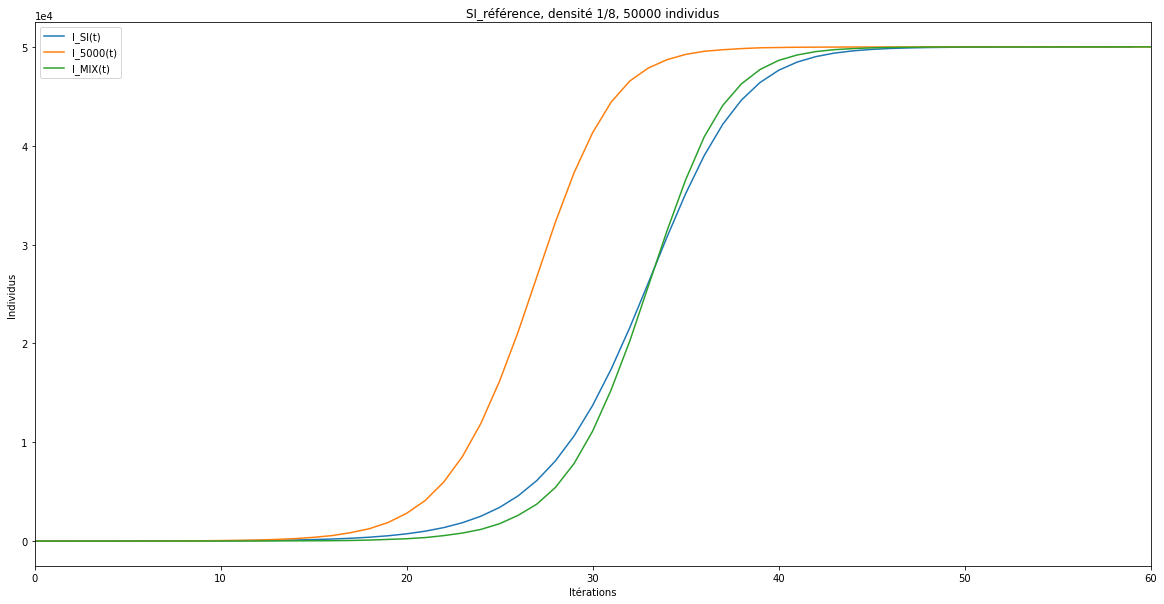

In [314]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.37
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [315]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  84587.94480283059  pour un paramètre beta =  0.46
MSE minimal (I_MIX,I_SI) :  406294.89849408425  pour un paramètre beta =  0.37
MSE (I_5000,I_MIX) :  42831086.346666664


### 100000 individus

In [316]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population100000"

In [317]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1880  21635867        4      8  21637761
   Init     Run  Mesures  Close   Total
0  1917  173466       94     62  175541


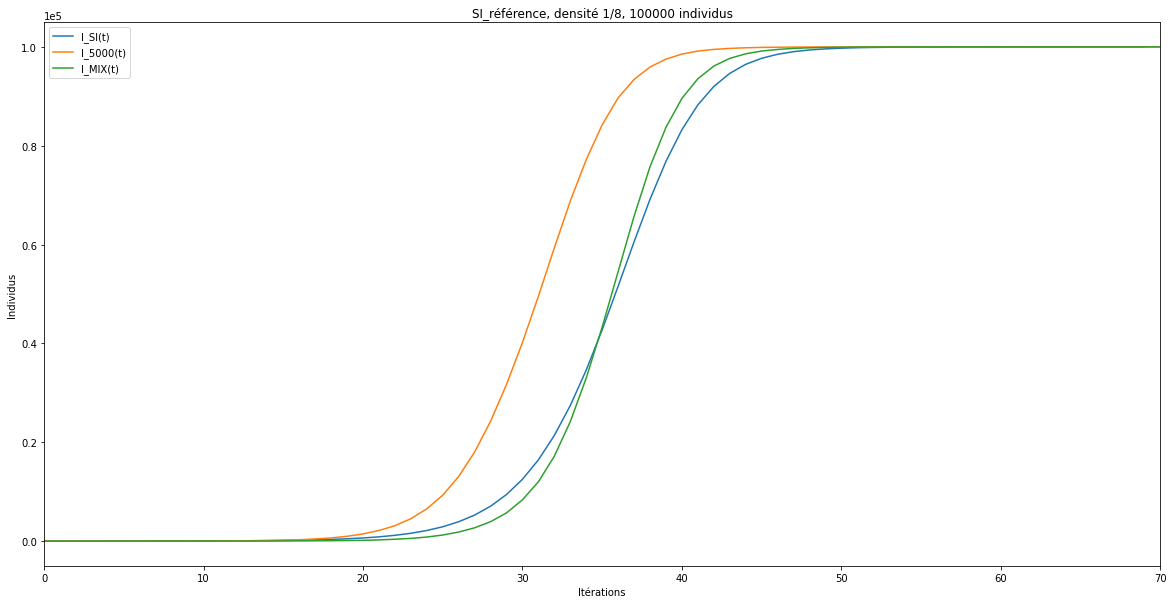

In [318]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.36
iterations = 70

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [319]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  198751.80910965853  pour un paramètre beta =  0.42
MSE minimal (I_MIX,I_SI) :  2260890.801454494  pour un paramètre beta =  0.36
MSE (I_5000,I_MIX) :  94191250.03333333


## Densité population 1/16

### 5000 individus

In [320]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population5000"

In [321]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    21  3667917        0     11  3667950
   Init   Run  Mesures  Close  Total
0   561  9384       44      0   9990


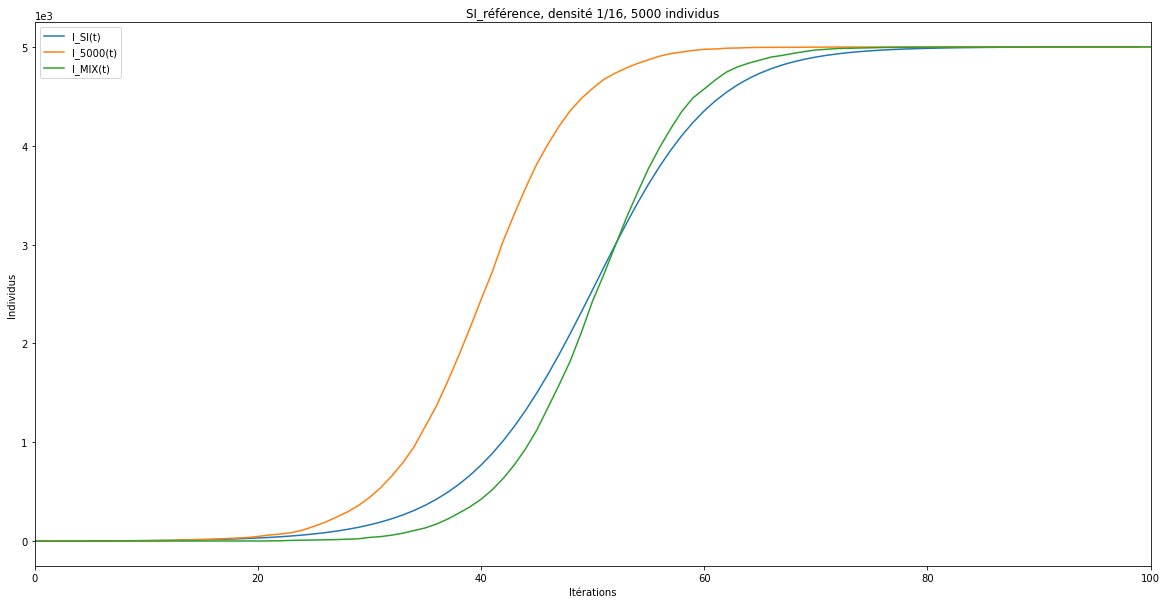

In [322]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.18
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [323]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]


print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  3811.2764194078254  pour un paramètre beta =  0.23
MSE minimal (I_MIX,I_SI) :  15096.460429324778  pour un paramètre beta =  0.18
MSE (I_5000,I_MIX) :  620739.04


### 20000 individus

In [324]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population20000"

In [325]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   490  8980600        7      1  8981100
   Init    Run  Mesures  Close  Total
0  1004  38307       30      1  39344


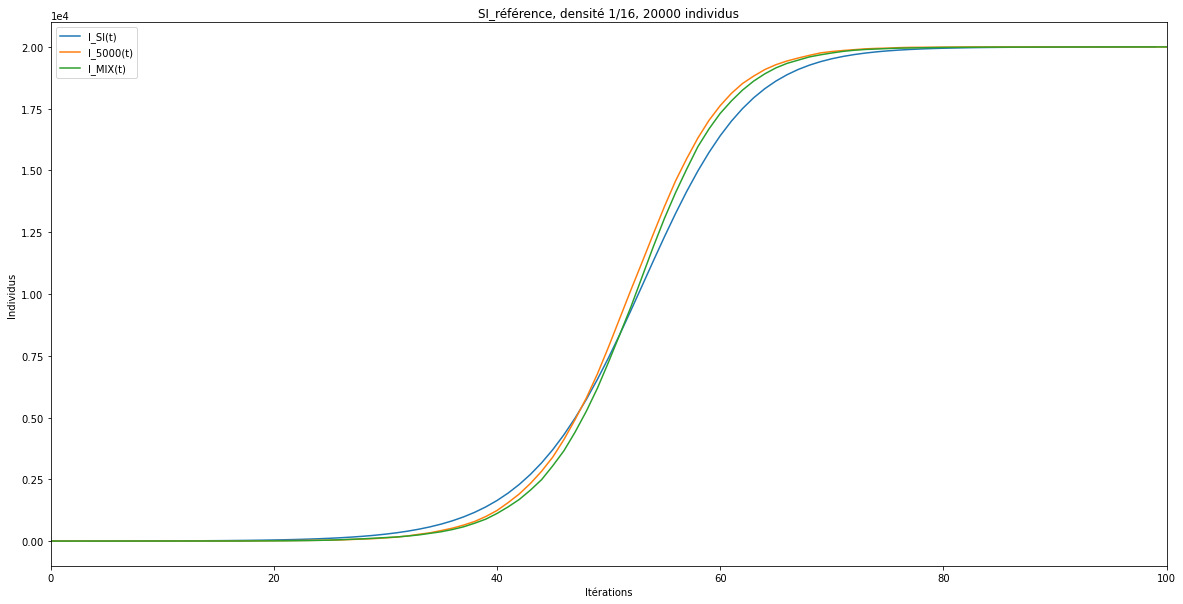

In [326]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.2
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [327]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  134882.46480086868  pour un paramètre beta =  0.2
MSE minimal (I_MIX,I_SI) :  85199.23250366823  pour un paramètre beta =  0.2
MSE (I_5000,I_MIX) :  31212.773333333334


### 50000 individus

In [328]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population50000"

In [329]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   466  15615841        5      8  15616322
   Init    Run  Mesures  Close  Total
0   307  91811       29     33  92181


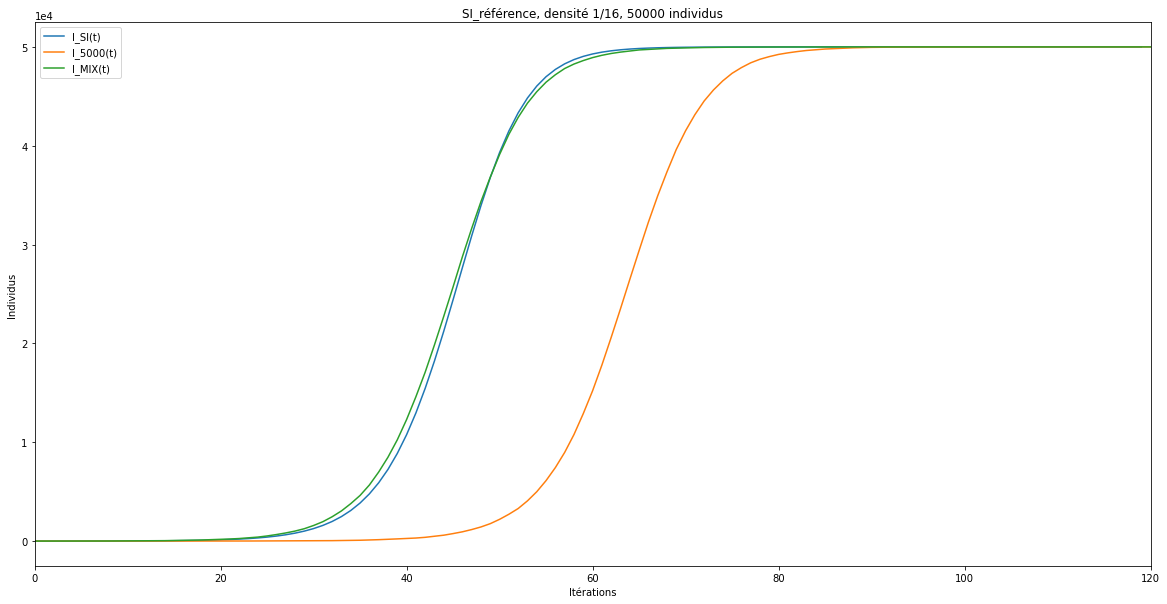

In [330]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.26
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [331]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  1396106.628901564  pour un paramètre beta =  0.18
MSE minimal (I_MIX,I_SI) :  175932.06195338804  pour un paramètre beta =  0.26
MSE (I_5000,I_MIX) :  180289533.30666667


### 100000 individus

In [332]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population100000"

In [333]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1801  22001140       10      6  22002959
   Init     Run  Mesures  Close   Total
0   595  175054       62     46  175758


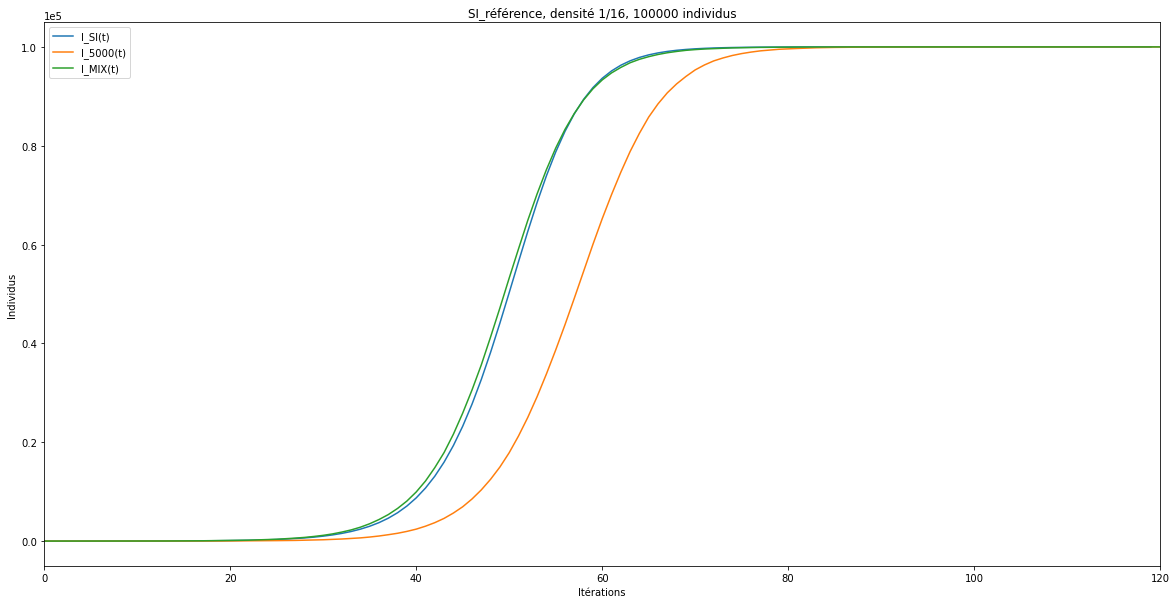

In [334]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.25
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [335]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  2115764.4228949207  pour un paramètre beta =  0.22
MSE minimal (I_MIX,I_SI) :  594424.1605779979  pour un paramètre beta =  0.25
MSE (I_5000,I_MIX) :  143114718.73333332
